## **Auteur** : TEBATTO ULRICH IROBA
## **Date** : Octobre 2024
## **Lieu** : Marseille, France
## **Projet** : Détection de Fraude Bancaire : Analyse et Modélisation.

## INTRODUCTION

### Objectif du Projet

L'objectif de ce projet est de développer une solution de détection de fraude bancaire en utilisant l'analyse de données et le machine learning avec Python. Le projet s'appuie sur un dataset de transactions pour analyser les schémas de fraude et modéliser la probabilité qu’une transaction soit frauduleuse. Ce projet couvre plusieurs étapes clés de la data science : de l'exploration des données (EDA) et de l'identification des caractéristiques déterminantes à la création et à l’évaluation d'un modèle prédictif.
Avec Python, nous explorerons plusieurs concepts fondamentaux de data science et de machine learning, notamment l'analyse de la distribution de classes dans des données déséquilibrées, la normalisation des données, et l'entraînement d'un modèle de classification. Un fil conducteur de ce projet est l'amélioration progressive de la compréhension des données jusqu'à l'implémentation d'un modèle de détection de fraude robuste et opérationnel.
Enfin, un tableau de bord interactif sera construit pour visualiser les résultats, tester différentes configurations de variables et fournir une interface utilisateur permettant d’explorer le modèle.

### Contexte Théorique

La détection de fraude est un problème de classification binaire complexe, car les transactions frauduleuses représentent souvent un faible pourcentage du dataset, entraînant un déséquilibre des classes. Le projet explore des algorithmes de classification tels que la régression logistique pour fournir une première approche de modélisation. D'autres techniques comme l'utilisation de la matrice de corrélation et de la normalisation permettront de préparer et d'optimiser les données pour la classification.
Ce projet aborde également les défis liés aux données déséquilibrées, en appliquant des méthodes d'ajustement comme la pondération des classes. Enfin, le modèle sera évalué avec des métriques adaptées, telles que l’AUC-ROC, pour s'assurer qu'il est capable de détecter les fraudes efficacement sans être influencé par le déséquilibre des données.

Ce projet utilise des techniques de machine learning pour détecter les transactions bancaires frauduleuses. 
Les étapes incluent :
- Prétraitement des données.
- Analyse Exploratoire des données
- Entraînement et Évaluation des Modèles.

## I. Prétraitement des données.

### 1. Importation des Bibliothèques et Librairies 

In [4]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from gc import collect
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import (train_test_split,
                            GridSearchCV, cross_val_score)
from sklearn.metrics import (confusion_matrix, classification_report, 
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             precision_recall_curve, auc)


### 2. Importation des données

In [5]:
# Chargement du datasets en dataframe
df_creditcard = pd.read_csv("creditcard.csv", sep=",")

# Structure et Description des Données
print("Taille")
print(df_creditcard.shape)
print("Aperçu du type de variables")
df_creditcard.info()
print("Les 5 prémières lignes")
df_creditcard.head(5)

# Suppression des doublons
df_creditcard.drop_duplicates()

# Valeurs manquantes
print("Valeurs manquantes par variable")
df_creditcard.isna().sum()

Taille
(284807, 31)
Aperçu du type de variables
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Commentaires

Nous avons un dataset constitué de 284807 lignes (transactions) et de 31 colonnes réprésentant les caractéristiques de ces transactions. Toutes les varibles sont de types numériques et il n'y a pas de valeurs manquantes. Les doublons ont été supprimés.

In [7]:
# Variable "Class"
df_creditcard['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

 Nous avons 284315 transactions non frauduleuses et 492 transactions frauduleuses. 

## II. Analyse Exploratoire des Données

### 1. Statistiques descriptives.

In [27]:
print("Résumé Statistique des données:")
df_creditcard.describe()

Résumé Statistique des données:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Analysons ces statistiques descriptives:

1. Count (Nombre d'observations) :  

   Pour chacunes des variables nous avons bien 284 807 observations, ce qui précise qu'il n'y a pas de valeurs manquantes. Cela simplifie le nettoyage des données et permet une analyse complète.


2. Mean (Moyenne) :  

   -  La moyenne de la variable `Amount` (88.35) suggère que les transactions sont en moyenne d'un montant relativement bas.

   -  La variable `Class` a une moyenne très faible (0.0017), ce qui confirme que la classe 1 (fraude) est extrêmement rare par rapport à la classe 0 (non-fraude).

   -  Les moyennes des autres variables (V1 à V28) sont proches de zéro, car ces variables ont subi une transformation ACP, centrée pour réduire les corrélations et maximiser la variabilité.


3. Standard Deviation (Écart-type) :  
   -  `Amount` a un écart-type de 250, ce qui signifie que le montant des transactions présente une forte variabilité.

   -  Les autres variables ont également des écarts-types élevés, surtout celles de PCA (V1 à V28), ce qui reflète une large dispersion.


4. Min, 25%, 50%, 75%, Max :  
   -  La distribution de `Amount` montre une médiane de 22, avec une forte différence entre le minimum (0) et le maximum (25 691), indiquant la présence de quelques transactions de montant très élevé.

   -  La variable `Time` présente un minimum de 0s et un maximum de 172 792s

   -  Pour les variables PCA (V1 à V28), les valeurs min et max sont parfois très élevées, mais les 25ème et 75ème percentiles montrent une concentration autour de 0, ce qui est normal pour des variables PCA normalisées.


5. Variable `Class` :  
   -  Le maximum de `Class` est de 1, ce qui représente la classe "fraude", tandis que la majorité des valeurs sont de 0 (non-fraude).
   -  Les quartiles (25%, 50%, et 75%) étant tous égaux à 0 montrent bien l'asymétrie de la distribution avec très peu de cas de fraude (environ 0.17% du dataset).


Ce prémier résultat nous a permis de comprendre la structure des données ainsi que la repartition des classes. N'étant pas très satisfaisant du point de vue de la détection de fraude, nous allons par la suite explorer efficacement les données en les visualisant.

Répartition des Classes (Fraude vs Non-Fraude)

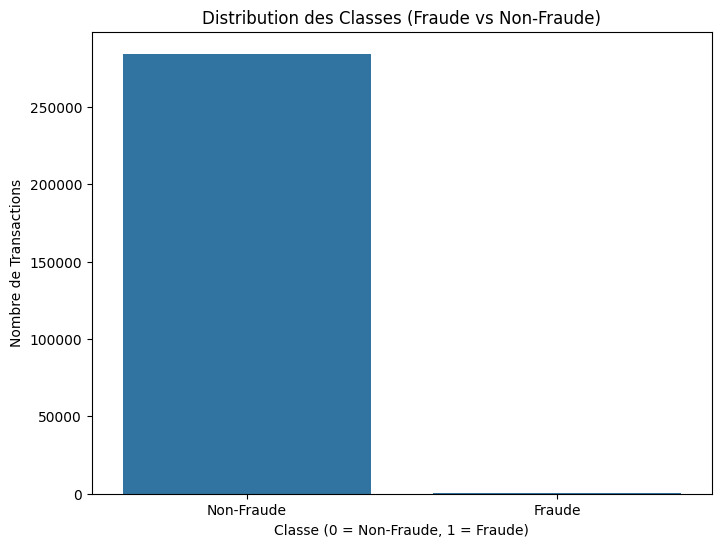

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

In [28]:
# Répartition des classes
distribution_de_Class = df_creditcard['Class'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df_creditcard)
plt.title('Distribution des Classes (Fraude vs Non-Fraude)')
plt.xlabel('Classe (0 = Non-Fraude, 1 = Fraude)')
plt.ylabel('Nombre de Transactions')
plt.xticks([0, 1], ['Non-Fraude', 'Fraude'])
plt.show()
distribution_de_Class

Commentaires :


Cette répartition montre que les transactions non frauduleuses représentent environ 99.83 % du dataset, tandis que les transactions frauduleuses ne représentent que 0.17 %. Ce déséquilibre nécessite des techniques adaptées lors de la modélisation pour gérer ce biais (dans la suite).

Nous poursuivons avec une analyse des transactions en fonction des caractéristiques importantes, notamment le montant, afin d’identifier d’éventuelles différences entre transactions frauduleuses et non frauduleuses.

### 2. Analyse du Montant des Transactions selon la Classe

C:\Users\TEBATTO\AppData\Local\Temp\ipykernel_7364\4246207098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df_creditcard, palette='Set2', showfliers=False)


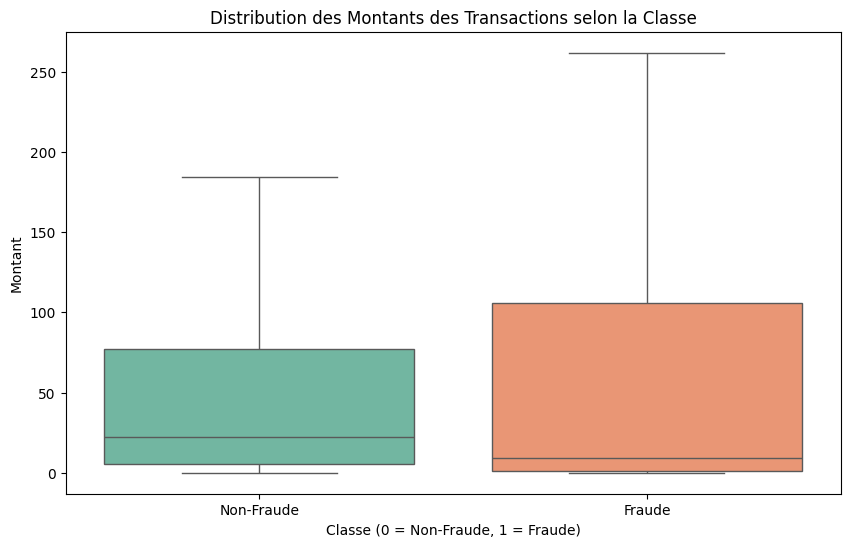

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [17]:
# Analyse des montants
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df_creditcard, palette='Set2', showfliers=False)
plt.title('Distribution des Montants des Transactions selon la Classe')
plt.xlabel('Classe (0 = Non-Fraude, 1 = Fraude)')
plt.ylabel('Montant')
plt.xticks([0, 1], ['Non-Fraude', 'Fraude'])
plt.show()

# Statistiques descriptives pour Amount
df_creditcard.groupby('Class')['Amount'].describe()

Analysons :

Les transactions frauduleuses ont un montant moyen de 122.21, avec une médiane de 9.25.
Les transactions non frauduleuses ont un montant moyen de 88.29, avec une médiane de 22.00.
La dispersion est importante dans les deux cas, mais les transactions frauduleuses semblent présenter une distribution plus étendue dans les montants élevés. Ce constat peut indiquer des comportements spécifiques dans les transactions frauduleuses, potentiellement utiles pour affiner un modèle prédictif.

Analyse du temps des Transactions selon la Classe

C:\Users\TEBATTO\AppData\Local\Temp\ipykernel_7364\183762261.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Time', data=df_creditcard, palette='Set2', showfliers=False)


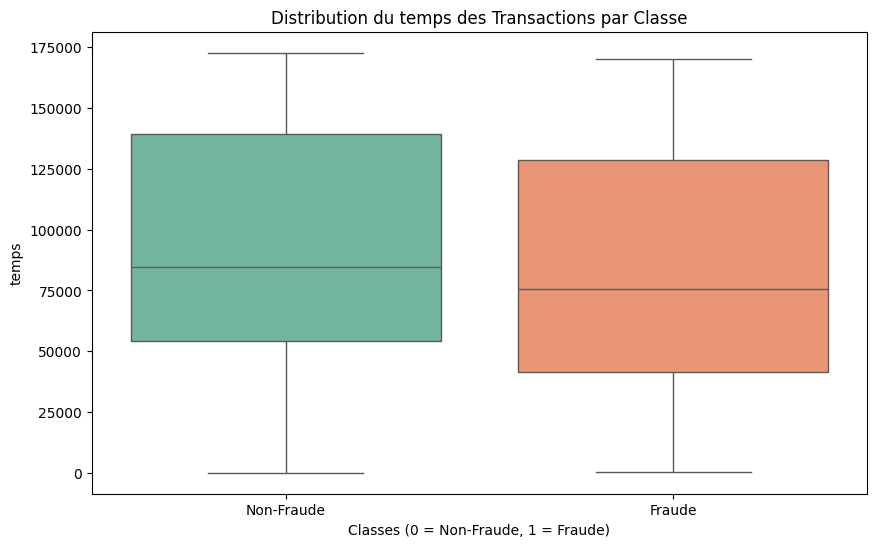

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


In [21]:
# Analyse du temps
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Time', data=df_creditcard, palette='Set2', showfliers=False)
plt.title('Distribution du temps des Transactions par Classe')
plt.xlabel('Classes (0 = Non-Fraude, 1 = Fraude)')
plt.ylabel('temps')
plt.xticks([0, 1], ['Non-Fraude', 'Fraude'])
plt.show()

# Statistiques descriptives pour Time
df_creditcard.groupby('Class')['Time'].describe()

Analysons : 

Les transactions frauduleuses seont légèrement concentrées plus tôt dans la période d'observation, avec une moyenne et une médiane de Time inférieures à celles des transactions non frauduleuses. Cependant, les deux classes présentent une large dispersion, indiquant que les fraudes peuvent se produire de manière aléatoire tout au long de la période.

### 3. Analyse des Corrélations

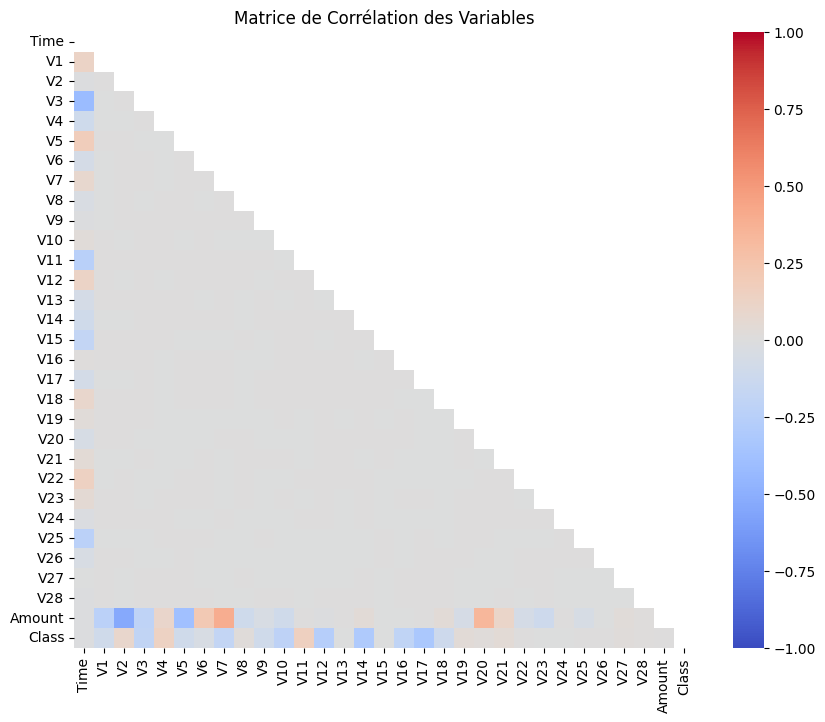

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [ ]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
matrice_de_correlation = df_creditcard.corr()
mask = np.triu(np.ones_like(matrice_de_correlation, dtype=bool)) # Masquage de la partie supérieure de la matrice
sns.heatmap(matrice_de_correlation,
             cmap="coolwarm", mask=mask,
             vmin=-1, vmax=1, annot=False, fmt=".2f")
plt.title("Matrice de Corrélation des Variables")
plt.show()

# Corrélations avec la variable `Class`
correlations_avec_class = matrice_de_correlation['Class'].sort_values(ascending=False)
correlations_avec_class

Interpretation des sorties ci-dessus


La matrice de corrélation révèle principalement des corrélations faibles entre les variables anonymisées (V1 à V28), ce qui est attendu avec la transformation (ACP) utilisée pour ces données. Les faibles corrélations suggèrent une bonne indépendance des dimensions, mais certaines variables semblent encore avoir une influence particulière sur la détection de la fraude.

Je vais approfondir en explorant les corrélations spécifiques des variables avec Class, en particulier pour identifier celles qui pourraient le mieux différencier les transactions frauduleuses des non frauduleuses. ​​

Les variables ayant les corrélations les plus fortes avec la classe Class (fraude) sont :

Positivement corrélées : V11, V4, V2 avec des valeurs de corrélation faibles mais non négligeables.
Négativement corrélées : V17, V14, V12, V10, V16, V3 montrent les corrélations négatives les plus significatives.
Ces variables pourraient être les plus importantes pour différencier les transactions frauduleuses des non frauduleuses dans un modèle prédictif.

# III. Entraînement et Évaluation des Modèles.

Préparation des Données d'entraînement et de test pour les Modèles.

In [32]:
# Préparation des données pour le modèle
X = df_creditcard.drop(columns=['Class'], axis=1) # Définition des caractéristiques 
y = df_creditcard['Class'] # Définition de la variable cible

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### 1. Régression Logistique

Scores AUC-ROC par validation croisée : [0.99198844 0.99142965 0.99161953 0.99143676 0.99146184]
Moyenne AUC-ROC par validation croisée : 0.9915872452586199

Matrice de confusion - Régression Logistique :
 [[55397  1467]
 [    8    90]]

Rapport de Classification - Régression Logistique :
               precision    recall  f1-score   support

  Non-Fraude       1.00      0.97      0.99     56864
      Fraude       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


AUC-ROC :
 0.9708434302252134


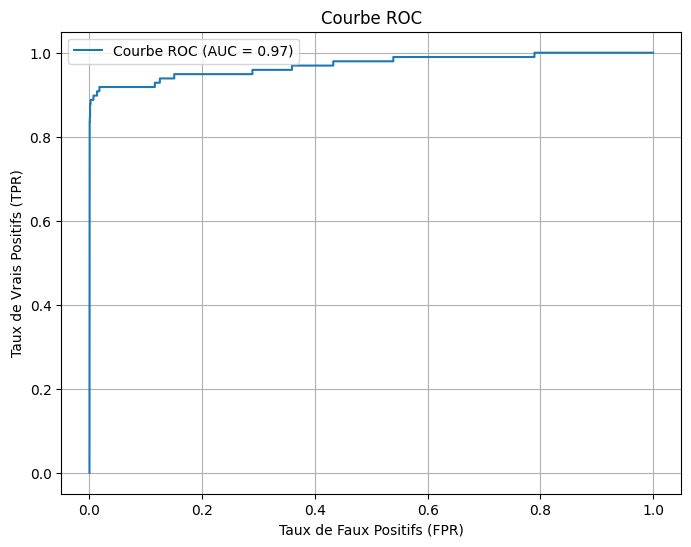

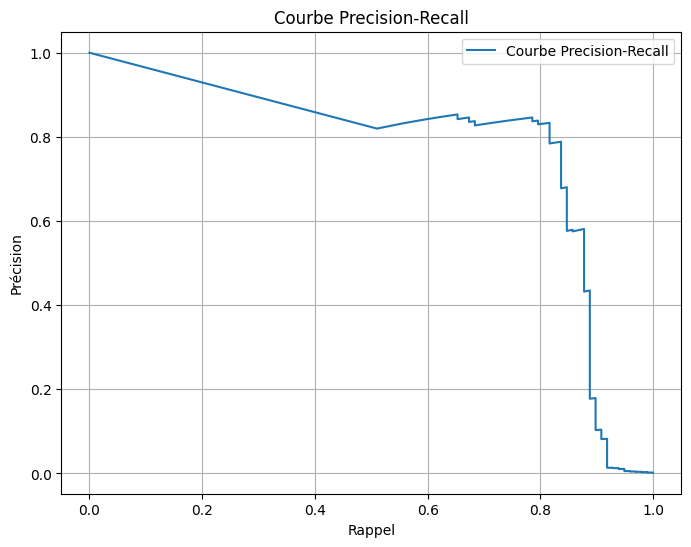


Matrice de confusion avec seuil ajusté (0.3) :
 [[53689  3175]
 [    8    90]]

Rapport de Classification avec seuil ajusté :
               precision    recall  f1-score   support

  Non-Fraude       1.00      0.94      0.97     56864
      Fraude       0.03      0.92      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.94      0.97     56962


AUC-ROC avec seuil ajusté :
 0.9708434302252134

Importance des variables :
         Coefficient
Var_29     2.270462
Var_1      1.815385
Var_4      1.584424
Var_5      1.294254
Var_2      0.897357
Var_22     0.546647
Var_3      0.534370
Var_11     0.525251
Var_28     0.341706
Var_23     0.329419
Var_19     0.207111
Var_21     0.062997
Var_15     0.012887
Var_25    -0.018004
Var_24    -0.028576
Var_27    -0.156401
Var_18    -0.157791
Var_26    -0.288070
Var_0     -0.504403
Var_13    -0.518710
Var_9     -0.630807
Var_7     -0.656596
Var_8  

In [50]:
# Normalisation des données 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gestion des classes déséquilibrées avec SMOTE 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modèle de Régression Logistique
mod = LogisticRegression(random_state=42, class_weight="balanced", max_iter=1000)
mod.fit(X_train_resampled, y_train_resampled)

# Validation croisée
scores = cross_val_score(mod, X_train_resampled, y_train_resampled, cv=5, scoring="roc_auc")
print("Scores AUC-ROC par validation croisée :", scores)
print("Moyenne AUC-ROC par validation croisée :", scores.mean())

# Prédiction et évaluation initiale
y_pred_rl = mod.predict(X_test)
y_proba = mod.predict_proba(X_test)[:, 1]

matrice_de_confusion = confusion_matrix(y_test, y_pred_rl)
rapport_de_classification = classification_report(y_test, y_pred_rl, target_names=["Non-Fraude", "Fraude"])
roc_auc = roc_auc_score(y_test, y_proba)

print("\nMatrice de confusion - Régression Logistique :\n", matrice_de_confusion)
print("\nRapport de Classification - Régression Logistique :\n", rapport_de_classification)
print("\nAUC-ROC :\n", roc_auc)

# Courbes ROC et Precision-Recall
fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Courbe ROC (AUC = {roc_auc:.2f})")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Courbe Precision-Recall")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbe Precision-Recall")
plt.legend()
plt.grid()
plt.show()

# Ajustement du seuil de décision
seuil = 0.3 
y_pred_seuil = (y_proba >= seuil).astype(int)
matrice_seuil = confusion_matrix(y_test, y_pred_seuil)
rapport_seuil = classification_report(y_test, y_pred_seuil, target_names=["Non-Fraude", "Fraude"])
roc_auc_seuil = roc_auc_score(y_test, y_proba)

print("\nMatrice de confusion avec seuil ajusté (0.3) :\n", matrice_seuil)
print("\nRapport de Classification avec seuil ajusté :\n", rapport_seuil)
print("\nAUC-ROC avec seuil ajusté :\n", roc_auc_seuil)

# Analyse de l'importance des variables
coefficients = pd.DataFrame(mod.coef_[0], index=["Var_" + str(i) for i in range(X_train.shape[1])], columns=["Coefficient"])
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print("\nImportance des variables :\n", coefficients)

# Sauvegarde du modèle final 
joblib.dump(mod, "modele_regression_logistique.pkl")
print("Modèle sauvegardé sous modele_regression_logistique.pkl")


### 2. Random Forest

Fitting 3 folds for each of 432 candidates, totalling 1296 fits

Meilleurs paramètres :  {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Meilleure performance (ROC AUC) :  0.9798352573005094

Rapport de Classification - Modèle Optimisé :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962


AUC-ROC - Modèle Optimisé : 0.9787556131062441


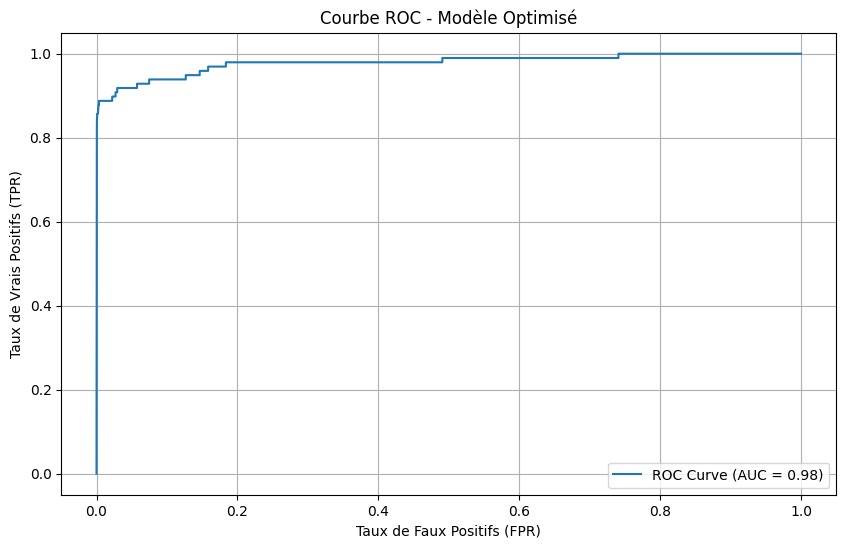

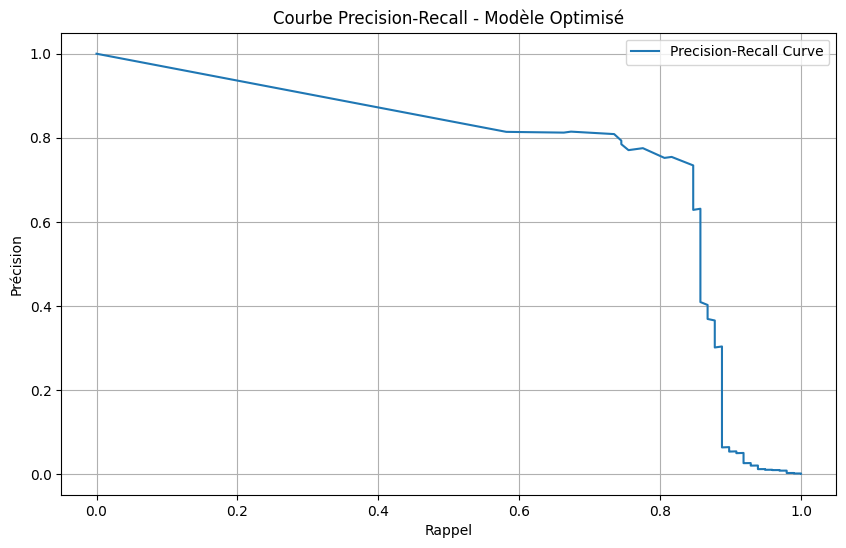


Importance des variables :
    Feature  Importance
14  Var_14    0.196920
10  Var_10    0.122913
4    Var_4    0.099301
12  Var_12    0.094348
17  Var_17    0.090394
3    Var_3    0.052783
2    Var_2    0.043537
7    Var_7    0.039177
11  Var_11    0.038105
16  Var_16    0.032926
9    Var_9    0.026594
21  Var_21    0.017763
29  Var_29    0.013524
19  Var_19    0.011515
20  Var_20    0.010581
6    Var_6    0.010539
18  Var_18    0.010257
1    Var_1    0.009718
5    Var_5    0.008915
8    Var_8    0.008732
27  Var_27    0.008597
26  Var_26    0.006724
15  Var_15    0.006690
23  Var_23    0.006681
13  Var_13    0.006466
22  Var_22    0.006256
0    Var_0    0.005926
28  Var_28    0.005779
25  Var_25    0.004679
24  Var_24    0.003662

Modèle optimisé sauvegardé sous modele_random_forest.pkl


In [40]:
#  Pipeline pour sous-échantillonnage et modèle 
pipeline = ImbPipeline(steps=[
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])


# Recherche d'hyperparamètres
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres 
print("\nMeilleurs paramètres : ", grid_search.best_params_)
print("Meilleure performance (ROC AUC) : ", grid_search.best_score_)

# Modèle optimisé
best_model = grid_search.best_estimator_

# Prédictions avec le modèle optimisé
y_pred_rf = best_model.predict(X_test)
y_proba_optimized = best_model.predict_proba(X_test)[:, 1]

# Rapport de classification pour le modèle optimisé
print("\nRapport de Classification - Modèle Optimisé :\n", classification_report(y_test, y_pred_rf))

# AUC-ROC pour le modèle optimisé
roc_auc_optimized = roc_auc_score(y_test, y_proba_optimized)
print("\nAUC-ROC - Modèle Optimisé :", roc_auc_optimized)

# Courbe ROC et Precision-Recall (Modèle optimisé)
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_proba_optimized)
precision_optimized, recall_optimized, _ = precision_recall_curve(y_test, y_proba_optimized)

plt.figure(figsize=(10, 6))
plt.plot(fpr_optimized, tpr_optimized, label=f"ROC Curve (AUC = {roc_auc_optimized:.2f})")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Modèle Optimisé")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(recall_optimized, precision_optimized, label="Precision-Recall Curve")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbe Precision-Recall - Modèle Optimisé")
plt.legend()
plt.grid()
plt.show()

# Importance des variables
importances = pd.DataFrame({
    "Feature": ["Var_" + str(i) for i in range(X_train.shape[1])],
    "Importance": best_model.named_steps['classifier'].feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\nImportance des variables :\n", importances)

# Sauvegarde du modèle optimisé
joblib.dump(best_model, "optimized_random_forest.pkl")
print("\nModèle optimisé sauvegardé sous modele_random_forest.pkl")


### 3. XGBoost 

Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\Users\TEBATTO\anaconda3\envs\envprojetML\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:38:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Meilleurs paramètres :  {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 577.2868020304569, 'classifier__subsample': 1.0}
Meilleure performance (ROC AUC) :  0.9825435847968181

XGBoost Optimisé - Rapport de Classification :
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962


AUC-ROC - Modèle Optimisé : 0.9797687716054345


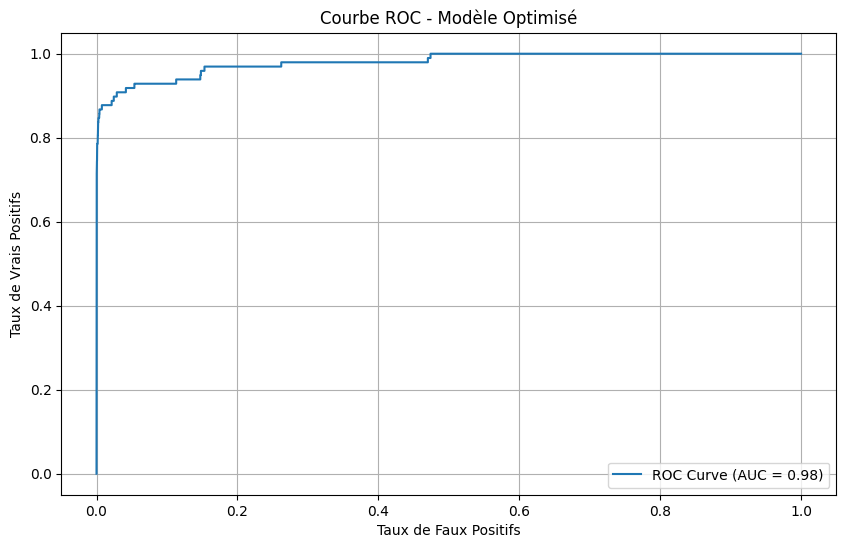

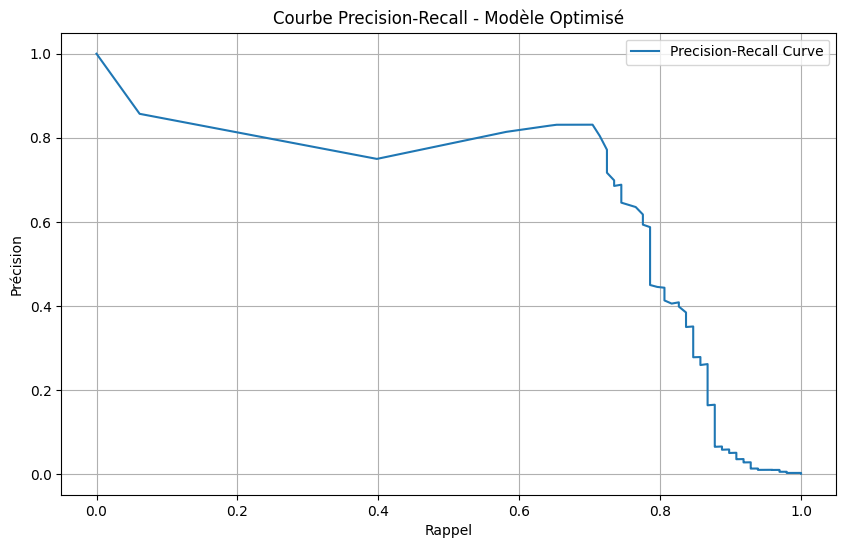


Modèle optimisé sauvegardé sous xgboost_optimise.pkl


In [38]:
# Pipeline avec sous-échantillonnage et XGBoost
pipeline = ImbPipeline(steps=[
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Validation croisée et recherche d'hyperparamètres
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
    'classifier__scale_pos_weight': [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("\nMeilleurs paramètres : ", grid_search.best_params_)
print("Meilleure performance (ROC AUC) : ", grid_search.best_score_)

# Modèle optimisé
best_model = grid_search.best_estimator_

# Prédictions avec le modèle optimisé
y_pred_xgb = best_model.predict(X_test)
y_proba_xgb = best_model.predict_proba(X_test)[:, 1]

# Rapport de classification pour le modèle optimisé
print("\nXGBoost Optimisé - Rapport de Classification :\n", classification_report(y_test, y_pred_xgb))

# AUC-ROC pour le modèle optimisé
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("\nAUC-ROC - Modèle Optimisé :", roc_auc_xgb)

# Courbe ROC et Precision-Recall (Modèle optimisé)
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_proba_xgb)
precision_optimized, recall_optimized, _ = precision_recall_curve(y_test, y_proba_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_optimized, tpr_optimized, label=f"ROC Curve (AUC = {roc_auc_optimized:.2f})")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - Modèle Optimisé")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(recall_optimized, precision_optimized, label="Precision-Recall Curve")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbe Precision-Recall - Modèle Optimisé")
plt.legend()
plt.grid()
plt.show()

# Sauvegarde du modèle optimisé
joblib.dump(best_model, "xgboost_optimise.pkl")
print("\nModèle optimisé sauvegardé sous xgboost_optimise.pkl")


### Évaluation des modèles à l'aide de matrices de confusion et courbes ROC.

Matrices de confusions

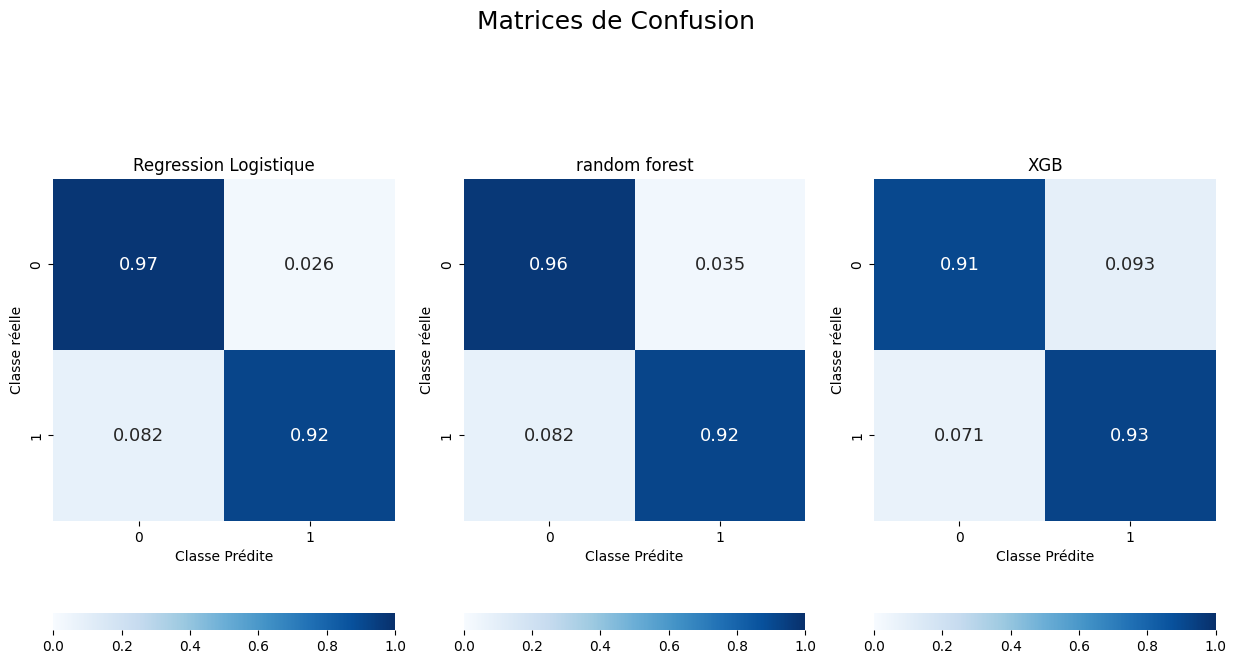

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15, 8))
f.suptitle("Matrices de Confusion", fontsize = 18.)
def matrice_conf(mc, t, axis):
    """_summary_

    Args:
        mc (float): La matrice de confusion
        t (str): Modèle de classification
        axis (int): Indique la position de la matrice
    """
    mc = mc.astype('float') / mc.sum(axis = 1)[:, np.newaxis]
    _ = sns.heatmap(mc, square=True, xticklabels=["0", "1"], vmin=0, vmax=1, annot=True,
                    annot_kws={"fontsize": 13}, yticklabels=["0", "1"],
                    cbar=True, cbar_kws={"orientation": "horizontal"}, ax=ax[axis], cmap="Blues").set(
        xlabel="Classe Prédite", ylabel="Classe réelle", title=t), collect()
    
matrice_conf(confusion_matrix(y_test, y_pred_rl), "Regression Logistique", 0)
matrice_conf(confusion_matrix(y_test, y_pred_rf), "random forest", 1)
matrice_conf(confusion_matrix(y_test, y_pred_xgb), "XGB", 2)

Interpretation des matrice de confusion :

Prenons le modéle XGBoost :

82067 est le nombre de transactions réellement non frauduleuses (classe 0) correctement classées comme non frauduleuses.
3240 represente les transactions non frauduleuses incorrectement classées comme frauduleuses.
Nous avons 8 transactions frauduleuses incorrectement classées comme non frauduleuses.
128 transactions réellement frauduleuses ont été correctement classées comme frauduleuses.


Précision pour les Fraudes (classe 1)
Recall = 0.94 est la capacité du modèle à détecter correctement les transactions frauduleuses.
Le modèle détecte correctement 94.1% des fraudes, ce qui est bon pour un modèle de détection de fraude.

Le modèle classifie incorrectement 3240 transactions non frauduleuses comme frauduleuses, ce qui peut avoir un impact opérationnel, car cela peut conduire à des alertes inutiles.

Exactitude Globale (Accuracy)
L’exactitude globale semble bonne, mais avec des classes déséquilibrées, l'exactitude peut être trompeuse. Il est donc essentiel de se concentrer sur les taux de rappel et de précision pour chaque classe.

Précision pour les Non-Fraudes (classe 0)
Le modèle est très performant pour reconnaître les transactions non frauduleuses, mais il pourrait être ajusté pour réduire les faux positifs (3240).


### Résumé
Le modèle XGBoost est efficace pour détecter les fraudes, mais il génère quelques faux positifs (non-fraudes classées comme fraudes). Un ajustement des hyperparamètres pour réduire ces faux positifs sans compromettre la détection des fraudes pourrait améliorer le modèle.

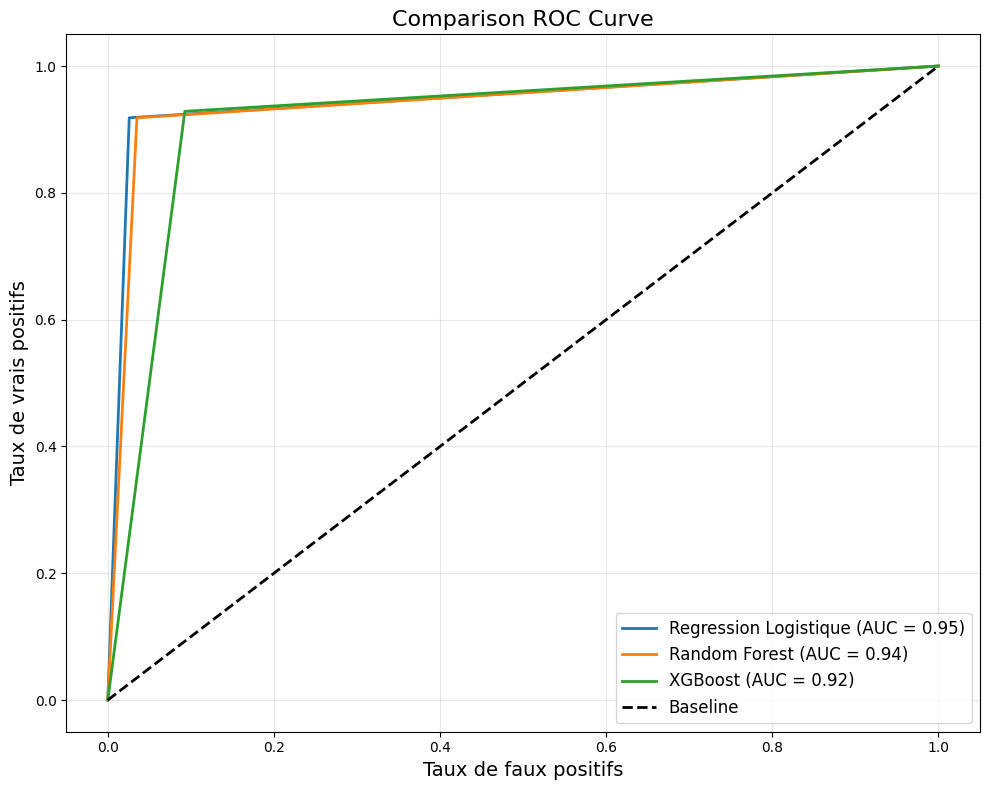

In [44]:
# Calcul du ROC curves et AUC pour chaque modèle
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_rl)
auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Graphes des ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f"Regression Logistique (AUC = {auc_log:.2f})", lw=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", lw=2)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Baseline")

plt.xlabel("Taux de faux positifs", fontsize=14)
plt.ylabel("Taux de vrais positifs", fontsize=14)
plt.title("Comparison ROC Curve", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


# REFERENCES
- Cours statistique exploratoire M1 Data Science 2023-2024 Aix-Marseille Université, Gregory maillard
- Cours Modèles Linéaires M1 Data Science 2023-2024 Aix-Marseille Université, Pudlo Pierre
- Cours IAAA M2 Data Science 2024-2025 Aix-Marseille Université, Hachem ,
- Cours Python M2 Data ...
- Coursera.fr
- Docstring.fr
- kaggle.fr
- chatgpt.com